Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

Loading the data set

In [2]:
df_train= pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")
df_orig = df_train.copy

In [3]:
df_train['data']='train'
df_test['data']='test'
data = pd.concat([df_train,df_test],axis=0, sort=True)

Exploratory Data Analysis(EDA): Exploratory data analysis is a complement to inferential statistics, which tends to be fairly rigid with rules and formulas. At an advanced level, EDA involves looking at and describing the data set from different angles and then summarizing it.

Data Exploration

we will perform the below operations to check what the data set comprises of.

– the shape of the dataset 
– info of the dataset
– summary of the dataset
– head of the dataset

The head function will tell you the top records in the data set. By default, python shows you only the top 5 records.

In [4]:
data.head()

,Burn Rate,Company Type,Date of Joining,Designation,Employee ID,Gender,Mental Fatigue Score,Resource Allocation,WFH Setup Available,data
0,0.16,Service,2008-09-30,2.0,fffe32003000360033003200,Female,3.8,3.0,No,train
1,0.36,Service,2008-11-30,1.0,fffe3700360033003500,Male,5.0,2.0,Yes,train
2,0.49,Product,2008-03-10,2.0,fffe31003300320037003900,Female,5.8,NaN,Yes,train
3,0.20,Service,2008-11-03,1.0,fffe32003400380032003900,Male,2.6,1.0,Yes,train
4,0.52,Service,2008-07-24,3.0,fffe31003900340031003600,Female,6.9,7.0,No,train


the shape of the dataset

The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data. The dataset has 139668 observations and 17 variables in the dataset.

In [5]:
data.shape

(35000, 10)

info of the dataset

is used to check the Information about the data and the datatypes of each respective attribute.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 0 to 12249
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Burn Rate             21626 non-null  float64
 1   Company Type          35000 non-null  object 
 2   Date of Joining       35000 non-null  object 
 3   Designation           35000 non-null  float64
 4   Employee ID           35000 non-null  object 
 5   Gender                35000 non-null  object 
 6   Mental Fatigue Score  32883 non-null  float64
 7   Resource Allocation   33619 non-null  float64
 8   WFH Setup Available   35000 non-null  object 
 9   data                  35000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.9+ MB


summary of the dataset

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [7]:
data.describe()

,Burn Rate,Designation,Mental Fatigue Score,Resource Allocation
count,21626.000000,35000.000000,32883.000000,33619.000000
mean,0.452005,2.177514,5.725350,4.473185
std,0.198226,1.134339,1.918292,2.046623
min,0.000000,0.000000,0.000000,1.000000
25%,0.310000,1.000000,4.500000,3.000000
50%,0.450000,2.000000,5.900000,4.000000
75%,0.590000,3.000000,7.100000,6.000000
max,1.000000,5.000000,10.000000,10.000000


 Check dataset features set names

In [8]:
data.columns

Index(['Burn Rate', 'Company Type', 'Date of Joining', 'Designation',
       'Employee ID', 'Gender', 'Mental Fatigue Score', 'Resource Allocation',
       'WFH Setup Available', 'data'],
      dtype='object')

This data has 9 independent variables and Burn Rate as the dependent variable (to be predicted). In predictive modeling, we should always check missing values in data. If any data is missing, we can use methods like mean, median, and predictive modeling imputation to make up for missing data.

### the distribution of Company Type column

In [9]:
def frequency_table(data, column):
    return pd.crosstab(index=data[column],  
                           columns="count").sort_values(by = "count", 
                                                        ascending = False)
freq_tab = frequency_table(data, "Company Type")
freq_tab

col_0,count
Company Type,
Service,22837
Product,12163


### Data Cleaning

### Check for missing value

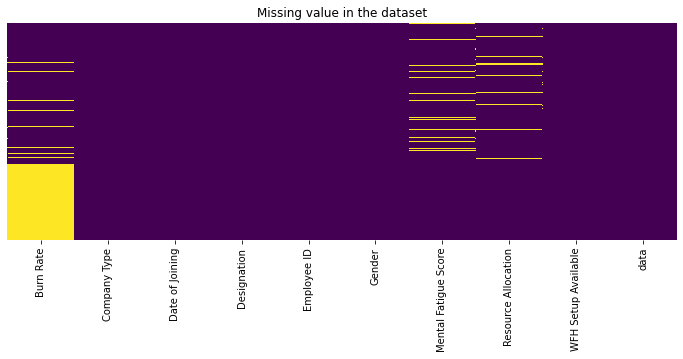

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

 Handling missing value

In [11]:
#Check out the Missing Values
data.isnull().sum()

Burn Rate               13374
Company Type                0
Date of Joining             0
Designation                 0
Employee ID                 0
Gender                      0
Mental Fatigue Score     2117
Resource Allocation      1381
WFH Setup Available         0
data                        0
dtype: int64

In [12]:
#handling missing values data
"""
1. Burn Rate : this field datatype is float and charges based on Gender category. Therefore,
we can take groupby mean of Gender and Burn Rate fill missing data
"""

data["Burn Rate"] = data["Burn Rate"].fillna(data.groupby('Gender')['Burn Rate'].transform('mean'))
data.isnull().sum()

Burn Rate                  0
Company Type               0
Date of Joining            0
Designation                0
Employee ID                0
Gender                     0
Mental Fatigue Score    2117
Resource Allocation     1381
WFH Setup Available        0
data                       0
dtype: int64

In [13]:
"""
2. Mental Fatigue Score : this field datatype is float and charges based on Gender category. Therefore,
we can take groupby mean of Gender and Mental Fatigue Score fill missing data
"""

data["Mental Fatigue Score"] = data["Mental Fatigue Score"].fillna(data.groupby('Gender')['Mental Fatigue Score'].transform('mean'))
data.isnull().sum()

Burn Rate                  0
Company Type               0
Date of Joining            0
Designation                0
Employee ID                0
Gender                     0
Mental Fatigue Score       0
Resource Allocation     1381
WFH Setup Available        0
data                       0
dtype: int64

In [14]:
"""
3. Resource Allocation : this field datatype is float and charges based on Gender category. Therefore,
we can take groupby mean of Company Type and Designation and Resource Allocation fill missing data
"""

data["Resource Allocation"] = data["Resource Allocation"].fillna(data.groupby(['Designation','Company Type'])['Resource Allocation'].transform('median'))
data.isnull().sum()

Burn Rate               0
Company Type            0
Date of Joining         0
Designation             0
Employee ID             0
Gender                  0
Mental Fatigue Score    0
Resource Allocation     0
WFH Setup Available     0
data                    0
dtype: int64

In [15]:
data = data[data["Burn Rate"] > 0]

### Assumptions for linear regression:

1. There exists a **linear** and **additive** relationship between dependent (DV) and independent variables (IV). By linear, it means that the change in DV by 1 unit change in IV is constant. By additive, it refers to the effect of X on Y is independent of other variables.

2. There must be **no correlation** among independent variables. Presence of correlation in independent variables lead to Multicollinearity. If variables are correlated, it becomes extremely difficult for the model to determine the true effect of IVs on DV.

3. The **error terms** must possess constant variance. Absence of constant variance leads to heteroskedestacity.

4. The error terms must be uncorrelated i.e. error at ∈t must not indicate the at error at ∈t+1. Presence of correlation in error terms is known as **Autocorrelation**. It drastically affects the regression coefficients and standard error values since they are based on the assumption of uncorrelated error terms.

5. The dependent variable and the error terms must possess a normal distribution.

Handling Categorical data

In [16]:
data.head()

,Burn Rate,Company Type,Date of Joining,Designation,Employee ID,Gender,Mental Fatigue Score,Resource Allocation,WFH Setup Available,data
0,0.16,Service,2008-09-30,2.0,fffe32003000360033003200,Female,3.8,3.0,No,train
1,0.36,Service,2008-11-30,1.0,fffe3700360033003500,Male,5.0,2.0,Yes,train
2,0.49,Product,2008-03-10,2.0,fffe31003300320037003900,Female,5.8,4.0,Yes,train
3,0.20,Service,2008-11-03,1.0,fffe32003400380032003900,Male,2.6,1.0,Yes,train
4,0.52,Service,2008-07-24,3.0,fffe31003900340031003600,Female,6.9,7.0,No,train


In [17]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
le_emp_id = LabelEncoder()

data['employee_id1'] = le_emp_id.fit(data['Employee ID'])
print(le_emp_id.classes_)
data['employee_id1'] = le_emp_id.transform(data['Employee ID'])

data = data.drop(['Employee ID'],axis=1)
data.head()

['fffe3100' 'fffe31003000' 'fffe310030003000' ... 'fffe3900390039003700'
 'fffe3900390039003800' 'fffe3900390039003900']


,Burn Rate,Company Type,Date of Joining,Designation,Gender,Mental Fatigue Score,Resource Allocation,WFH Setup Available,data,employee_id1
0,0.16,Service,2008-09-30,2.0,Female,3.8,3.0,No,train,11734
1,0.36,Service,2008-11-30,1.0,Male,5.0,2.0,Yes,train,32125
2,0.49,Product,2008-03-10,2.0,Female,5.8,4.0,Yes,train,3621
3,0.20,Service,2008-11-03,1.0,Male,2.6,1.0,Yes,train,16365
4,0.52,Service,2008-07-24,3.0,Female,6.9,7.0,No,train,10394


In [18]:
#to avoid multicollinearity, let's check correlation matrix.
data.corr()

,Burn Rate,Designation,Mental Fatigue Score,Resource Allocation,employee_id1
Burn Rate,1.000000,0.573885,0.685714,0.663852,-0.006824
Designation,0.573885,1.000000,0.662855,0.879392,-0.003971
Mental Fatigue Score,0.685714,0.662855,1.000000,0.768473,0.000322
Resource Allocation,0.663852,0.879392,0.768473,1.000000,-0.006989
employee_id1,-0.006824,-0.003971,0.000322,-0.006989,1.000000


In [19]:
#Get a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib
import seaborn as sn
import matplotlib.pyplot as plt

There are many ways you can plot correlation matrices one efficient way is using the heatmap. It is very easy to understand the correlation using heatmaps it tells the correlation of one feature(variable) to every other feature(variable). In other words, A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.

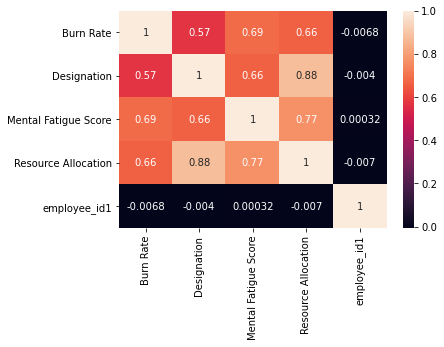

In [20]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

You can do variable selection based on p values. If a variable shows p value > 0.05, we can remove that variable from model since at p> 0.05, we'll always fail to reject null hypothesis.

At the last row i.e Selling_price,see how the Selling_price is correlated with other features Market_Category, Grade, Discount_avail, charges_1, Minimum_price,Maximum_price,Product_Category,instock_date, Loyalty_customer is the highly correlated with price range followed by Shall_no,Demand, Charges_2(%) seems to be least correlated with price_range.

In [21]:
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])
# Extract features - year, month, day, hour
data['year'] = data['Date of Joining'].dt.year 
data['month'] = data['Date of Joining'].dt.month 
data['day'] = data['Date of Joining'].dt.day 
data['hour'] = data['Date of Joining'].dt.hour


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34728 entries, 0 to 12249
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Burn Rate             34728 non-null  float64       
 1   Company Type          34728 non-null  object        
 2   Date of Joining       34728 non-null  datetime64[ns]
 3   Designation           34728 non-null  float64       
 4   Gender                34728 non-null  object        
 5   Mental Fatigue Score  34728 non-null  float64       
 6   Resource Allocation   34728 non-null  float64       
 7   WFH Setup Available   34728 non-null  object        
 8   data                  34728 non-null  object        
 9   employee_id1          34728 non-null  int32         
 10  year                  34728 non-null  int64         
 11  month                 34728 non-null  int64         
 12  day                   34728 non-null  int64         
 13  hour            

In [23]:
data = pd.get_dummies(data, columns = ["Company Type", "Gender", "WFH Setup Available"], drop_first = True)

In [24]:
train=data[data['data']=='train']
del train['data']
train.columns

Index(['Burn Rate', 'Date of Joining', 'Designation', 'Mental Fatigue Score',
       'Resource Allocation', 'employee_id1', 'year', 'month', 'day', 'hour',
       'Company Type_Service', 'Gender_Male', 'WFH Setup Available_Yes'],
      dtype='object')

In [25]:
test=data[data['data']=='test']
test.drop(["data", "Burn Rate"],axis=1,inplace=True)
test.columns

C:\Users\anjal\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['Date of Joining', 'Designation', 'Mental Fatigue Score',
       'Resource Allocation', 'employee_id1', 'year', 'month', 'day', 'hour',
       'Company Type_Service', 'Gender_Male', 'WFH Setup Available_Yes'],
      dtype='object')

In [26]:
train = train[train["Burn Rate"] > 0]

In [27]:
columns = ["Designation", "Resource Allocation","Mental Fatigue Score","month", "day","Date of Joining"]
train = train.drop(columns=columns)
test = test.drop(columns=columns)


In [28]:
from sklearn.model_selection import train_test_split

# Splitting data into train and validation sets
y =  train["Burn Rate"]
X = train.loc[:, train.columns != 'Burn Rate']

X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
X_valid.head()

,employee_id1,year,hour,Company Type_Service,Gender_Male,WFH Setup Available_Yes
6880,1411,2008,0,0,0,1
14116,25230,2008,0,1,0,1
6621,14789,2008,0,1,1,0
20166,5442,2008,0,0,0,0
12692,10885,2008,0,1,0,1


In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train,y_train)

print("Intercept:", lin_reg.intercept_)

lr_coefficients = list(zip(X_train,lin_reg.coef_))
print("\nNumber of coefficients:",len(lr_coefficients))
print("\nFeature coefficients:",*lr_coefficients, sep='\n')


Intercept: 0.4901514727709462

Number of coefficients: 6

Feature coefficients:
('employee_id1', -1.6555684530177417e-07)
('year', 2.7755575615628914e-17)
('hour', -3.469446951953614e-17)
('Company Type_Service', 0.0035306484199918715)
('Gender_Male', 0.0521808106769397)
('WFH Setup Available_Yes', -0.10574868370225605)


In [31]:
lr_predicted_train=abs(lin_reg.predict(X_train))
lr_predicted_valid=abs(lin_reg.predict(X_valid))


In [32]:
from sklearn.metrics import mean_absolute_error
import numpy as np


rmse1 = np.sqrt(mean_absolute_error(y_train, lr_predicted_train))
rmse2 = np.sqrt(mean_absolute_error(y_valid, lr_predicted_valid))
print("train_rmse =", rmse1)
print("valid_rmse =", rmse2)

train_rmse = 0.3710663632804303
valid_rmse = 0.3707912475405773


In [33]:
from sklearn.metrics import mean_squared_log_error


RMSLE = np.sqrt(mean_squared_log_error(y_train,lr_predicted_train))
score1 = max(0,100 - RMSLE)
print("train_score =", score1)
RMSLE = np.sqrt(mean_squared_log_error(y_valid,lr_predicted_valid))
score2 = max(0,100 - RMSLE)
print("valid_score =", score2)

train_score = 99.87669371495073
valid_score = 99.87627076531334


In [34]:
test.head()

,employee_id1,year,hour,Company Type_Service,Gender_Male,WFH Setup Available_Yes
0,4404,2008,0,1,0,0
1,3509,2008,0,0,0,1
2,27421,2008,0,0,1,1
3,8743,2008,0,1,0,0
4,18717,2008,0,0,0,0


In [35]:
y_pred=abs(lin_reg.predict(test))


In [37]:
df_sub = pd.DataFrame()
test['employee_id1'] = le_emp_id.inverse_transform(test['employee_id1'])
df_sub['Employee ID'] = test['employee_id1']


df_sub['Burn Rate'] = np.array(y_pred)


In [38]:
df_sub.to_csv("submission.csv",index=False)